In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import pandas as pd


In [5]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json
!mv /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d ahsan81/hotel-reservations-classification-dataset

mkdir: cannot create directory ‘/root/.kaggle’: File exists
100% 480k/480k [00:00<00:00, 877kB/s]
100% 480k/480k [00:00<00:00, 876kB/s]


### Extraction of data


In [6]:
zip_ref = zipfile.ZipFile("/content/hotel-reservations-classification-dataset.zip")
zip_ref.extractall()
zip_ref.close()

In [7]:
df = pd.read_csv("/content/Hotel Reservations.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [9]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [10]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

#### No null value our dataset seems to be whole

In [11]:
columns_num = []
for i in df.columns:
  if df[i].dtype == np.int64 or df[i].dtype == np.float64:
    columns_num.append(i)
columns_num

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

### Visualization of data

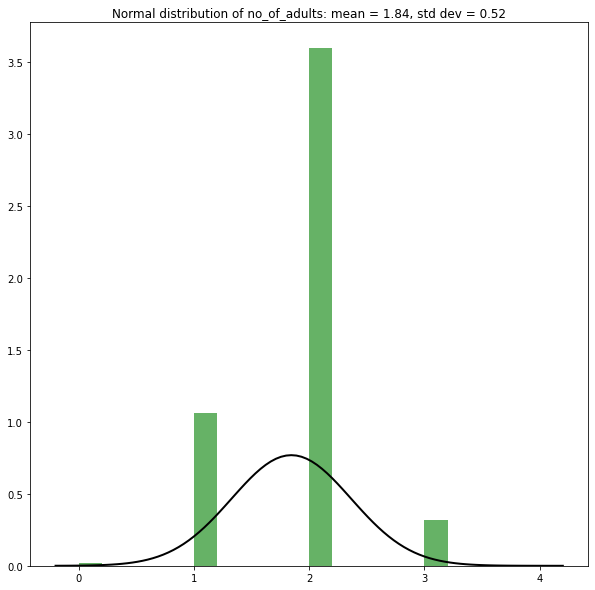

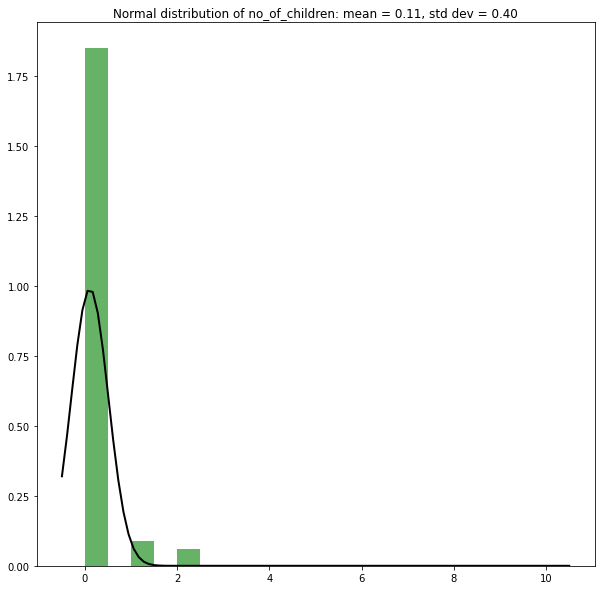

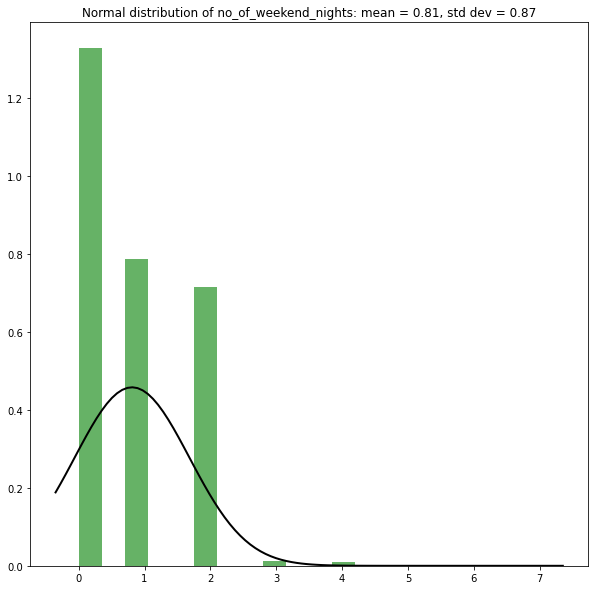

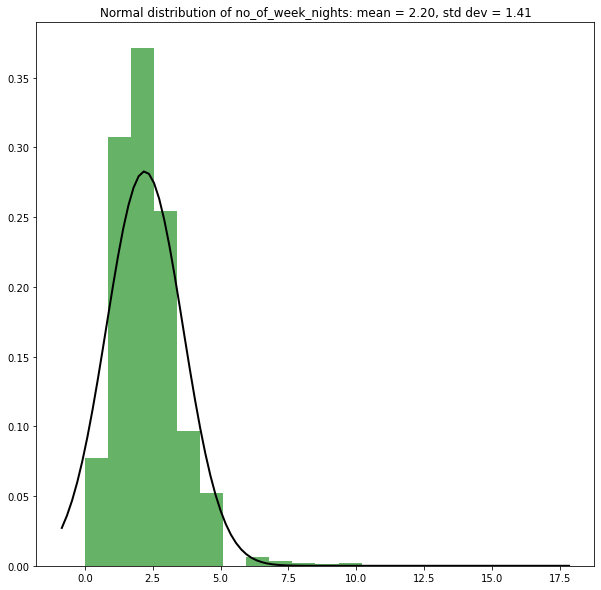

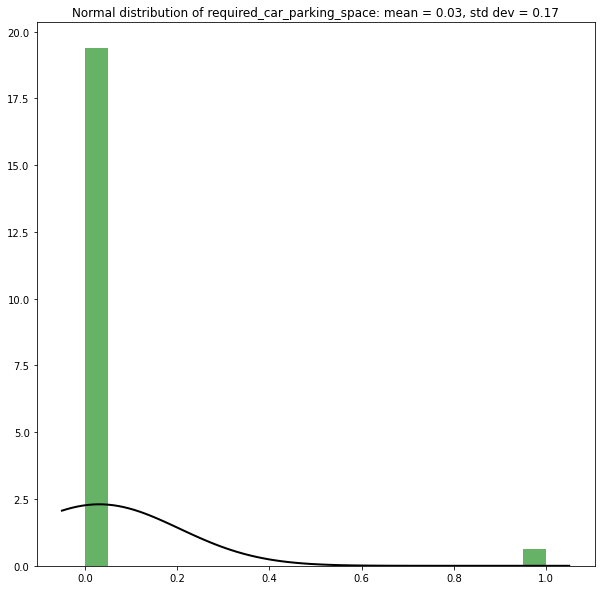

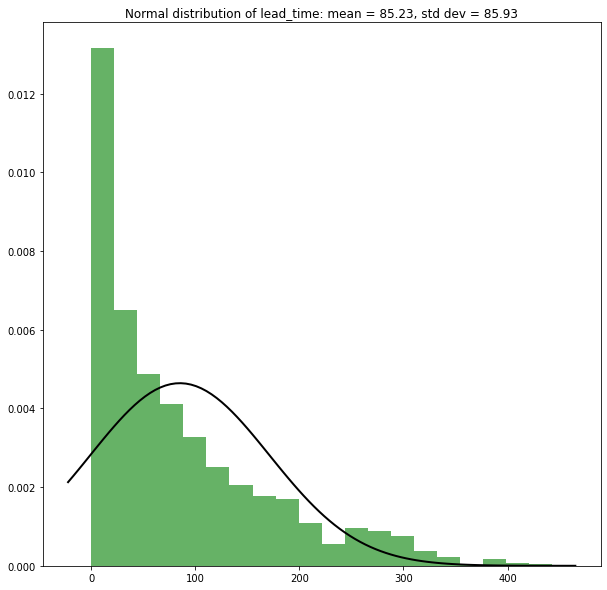

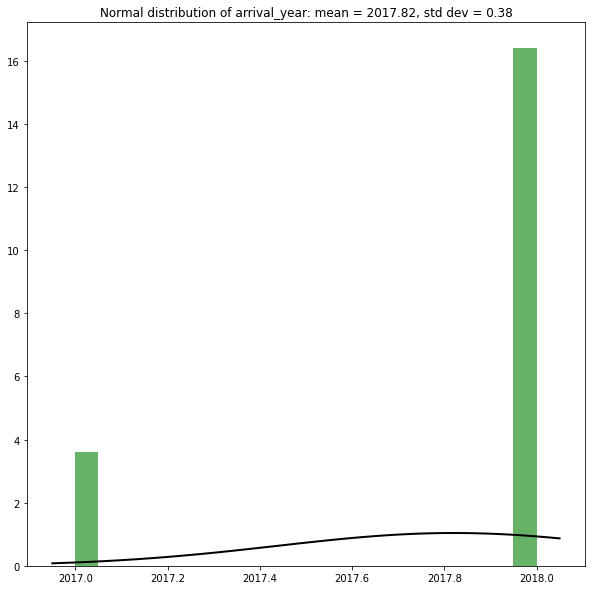

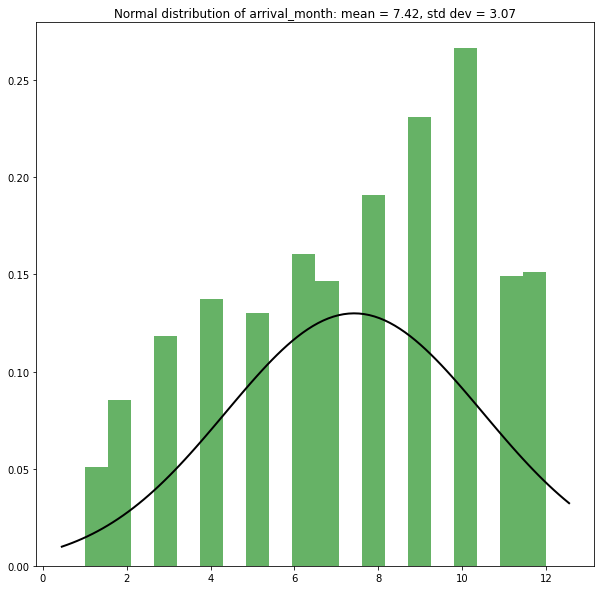

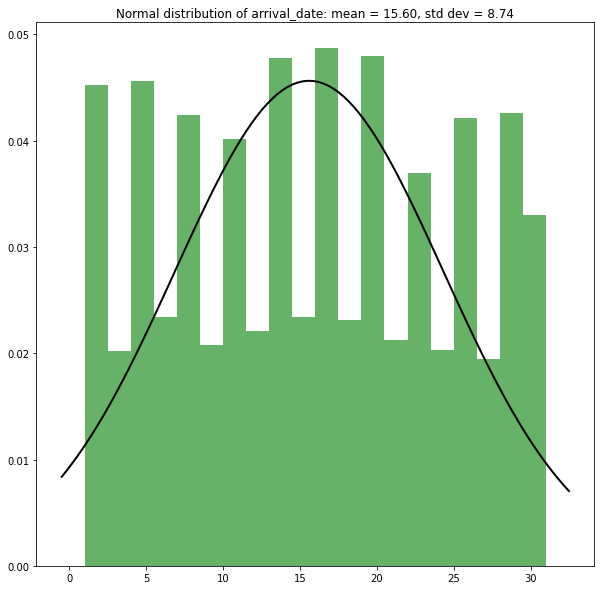

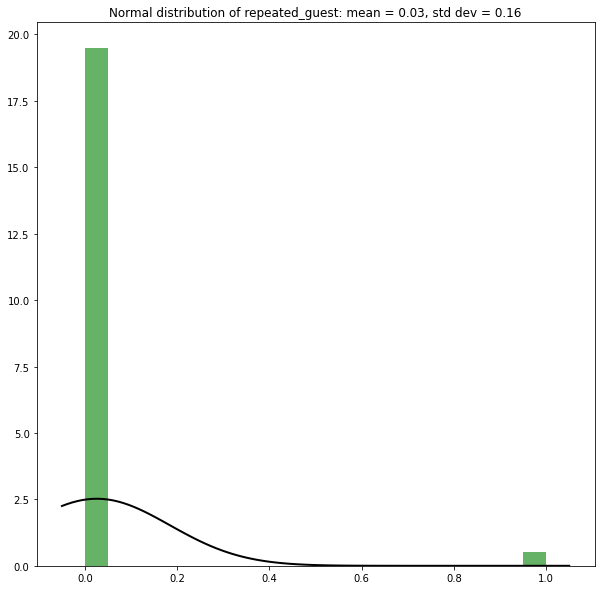

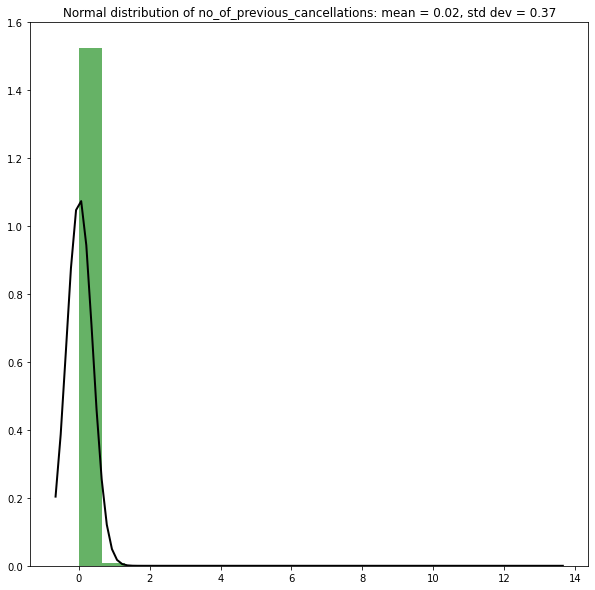

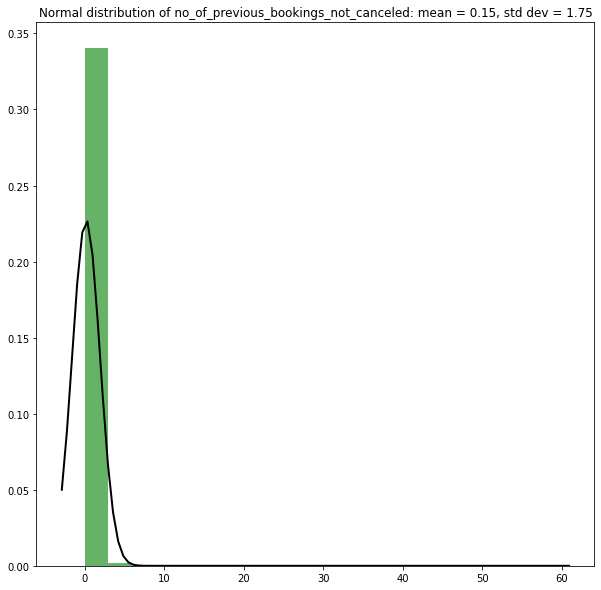

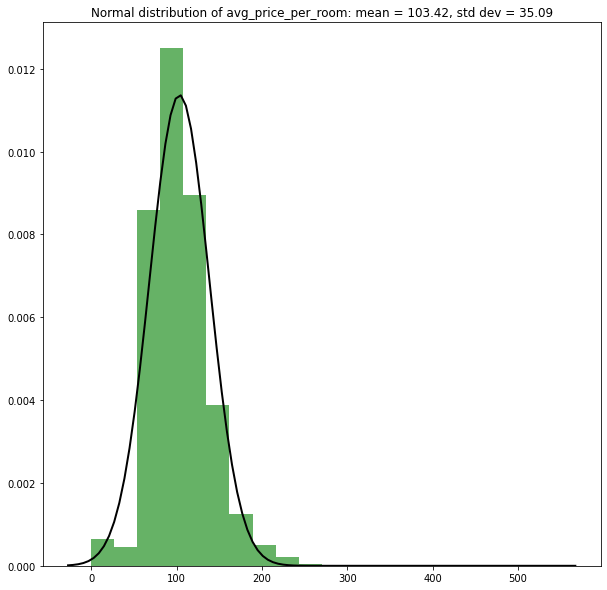

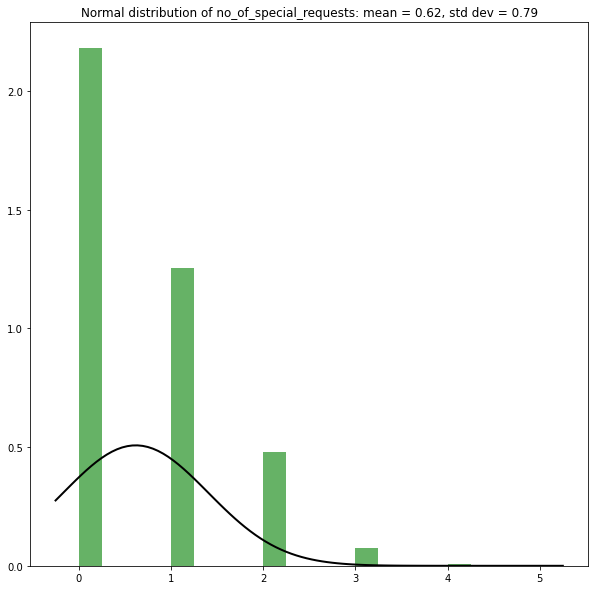

In [12]:
from scipy.stats import norm

for i in columns_num:
  col = df[i]
  mean, std_dev = norm.fit(col)

  # create a histogram of the column with a normal distribution curve
  plt.figure(figsize=(10,10))
  plt.hist(col, bins=20, density=True, alpha=0.6, color='g')
  xmin, xmax = plt.xlim()
  x = np.linspace(xmin, xmax, 100)
  p = norm.pdf(x, mean, std_dev)
  plt.plot(x, p, 'k', linewidth=2)
  title = f"Normal distribution of {i}: mean = {mean:.2f}, std dev = {std_dev:.2f}"
  plt.title(title)
  plt.show()

### columns ["repeated_guest", " required_car_parking_space"] are in 0 1 labels, and arrival_year are data so we won't be using this column in future 

In [13]:
df = df.drop("arrival_year",axis='columns')
df = df.drop("Booking_ID", axis= "columns")
df = df.drop("arrival_date", axis="columns")

In [14]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_month',
       'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

#### For the final data we will be using columns from above (integer columns) +  ["type_of_meal_plan", "room_type_reserved", "market_segment_type"] and we will try to evaluate booking_status 

In [15]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_month',
       'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [16]:
y = df["booking_status"]

## First evaluating is going to be evaluating the avg_price_per_room, so the additional useless information is "booking_status"

In [17]:
df = df.drop("booking_status", axis="columns")

y = df["avg_price_per_room"]
X = df.drop("avg_price_per_room", axis="columns")

<AxesSubplot:>

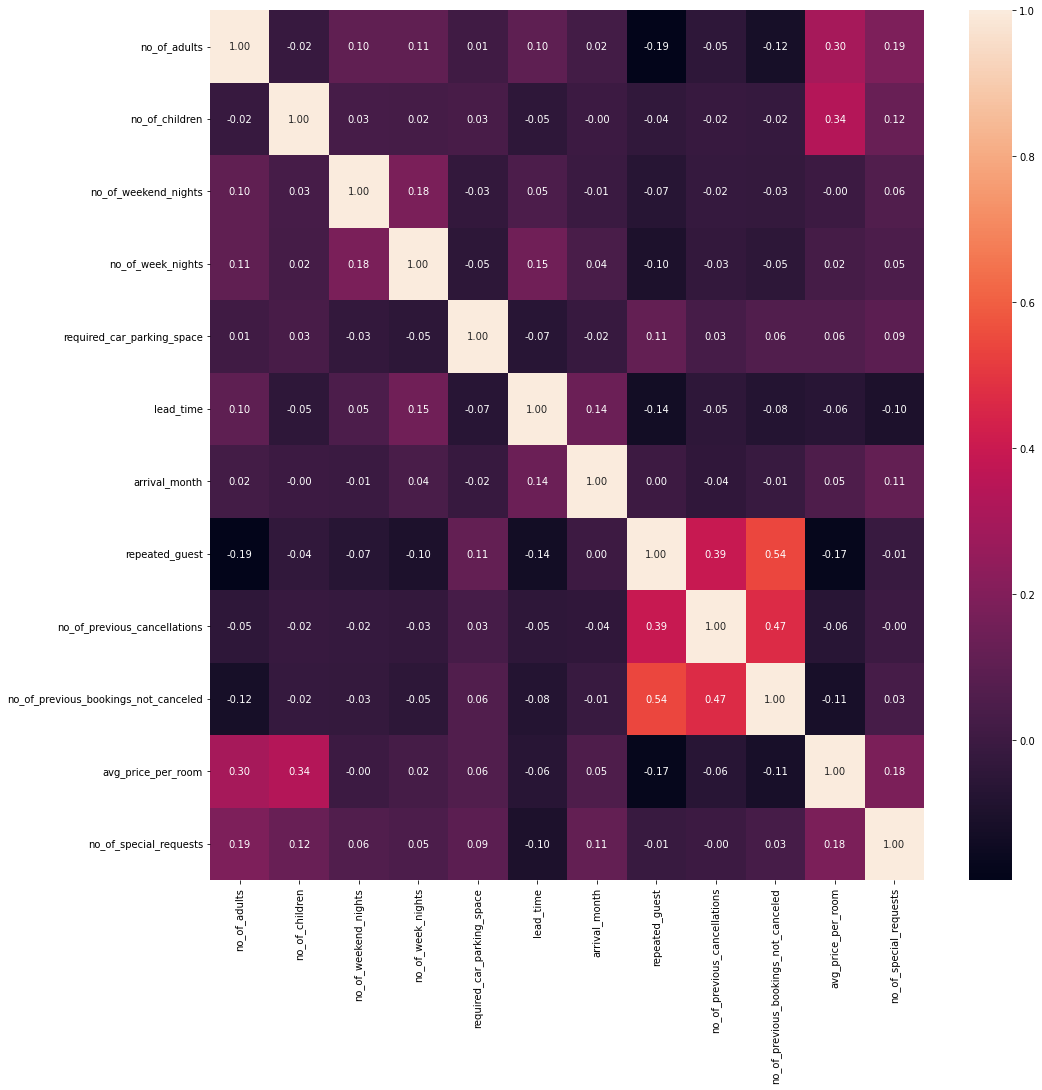

In [18]:
import seaborn as sns
plt.figure(figsize=(16,16))
sns.heatmap(data=df.corr(), annot=True, fmt=".2f")

In [38]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculating model accurancy, precision, recall and f1 score
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  ## Calculate model precision
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  
  model_results = {"accuracy": model_accuracy,
                   "precision":model_precision * 100,
                   "recall":model_recall * 100,
                   "f1":model_f1 * 100}

  return model_results

### Data dont have any strong correlances with each other

#### We will consider following models for our data and suggested label:
1. SGD Regressor
2. Lasso
3. ElasticNet
4. DeepLearning

### Prepare data, onehotencode, minmaxscalar

In [19]:
df.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_month                             int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
dtype: object

In [20]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
clf = OneHotEncoder()
data_one_hot = clf.fit_transform(df[["type_of_meal_plan", "room_type_reserved","market_segment_type"]])
data_one_hot = pd.DataFrame(data_one_hot)
df_one_hot = pd.concat([df.drop(["type_of_meal_plan", "room_type_reserved","market_segment_type"], axis=1), data_one_hot], axis=1)
df_Encoded = pd.DataFrame(df_one_hot)

In [21]:
df_Encoded = df_Encoded.drop(0, axis=1)

In [22]:
df_Encoded.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_month', 'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests'],
      dtype='object')

In [23]:
clf = MinMaxScaler()
data_transformed = clf.fit_transform(df_Encoded.to_numpy())
data_converted = pd.DataFrame(data_transformed)

In [24]:
data_converted.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.50,0.0,0.142857,0.117647,0.0,0.505643,0.818182,0.0,0.0,0.0,0.120370,0.0
1,0.50,0.0,0.285714,0.176471,0.0,0.011287,0.909091,0.0,0.0,0.0,0.197556,0.2
2,0.25,0.0,0.285714,0.058824,0.0,0.002257,0.090909,0.0,0.0,0.0,0.111111,0.0
3,0.50,0.0,0.000000,0.117647,0.0,0.476298,0.363636,0.0,0.0,0.0,0.185185,0.0
4,0.50,0.0,0.142857,0.058824,0.0,0.108352,0.272727,0.0,0.0,0.0,0.175000,0.0


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_converted.to_numpy(), y, test_size=0.2, random_state=42)

## Model 1: SGD Regressor

In [26]:
from sklearn.linear_model import SGDRegressor

reg = SGDRegressor(max_iter=1000, tol=1e-3)
reg.fit(X_train, y_train)

SGDRegressor()

In [27]:
values_pred = reg.predict(X_test)

In [28]:
dfs = pd.DataFrame(data={"Expected_value": y_test, "Predicted_value": values_pred})
dfs

,Expected_value,Predicted_value
4968,90.00,92.034747
34540,48.67,50.377802
36108,95.20,95.573261
1553,127.67,126.879492
24974,201.50,199.797380
...,...,...
35781,90.90,91.258745
12257,90.95,91.507360
27212,140.00,138.800536
28097,85.00,85.483704


In [37]:
reg_score = reg.score(X_train,y_train)
reg_score

0.9991434999556439

## Model have nearly 100% right evaluation on dataset to evaluate avg_price_per_room

## Model 2: Lasso

In [31]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)

Lasso(alpha=0.1)

In [41]:
values_pred_2 = clf.predict(X_test)

In [42]:
dfs = pd.DataFrame(data={"Expected_value": y_test, "Predicted_value": values_pred_2})
dfs

,Expected_value,Predicted_value
4968,90.00,90.590542
34540,48.67,51.068237
36108,95.20,95.563104
1553,127.67,126.612929
24974,201.50,197.213746
...,...,...
35781,90.90,91.451178
12257,90.95,91.498991
27212,140.00,138.403638
28097,85.00,85.809233


In [43]:
lasso_score = reg.score(X_train,y_train)
lasso_score

0.9991434999556439

## Model 3:ElasticNet

In [44]:
from sklearn.linear_model import ElasticNet
regr = ElasticNet(random_state=42)
regr.fit(X_train, y_train)

ElasticNet(random_state=42)

In [45]:
values_pred_3 = regr.predict(X_test)

In [46]:
dfs = pd.DataFrame(data={"Expected_value": y_test, "Predicted_value": values_pred_3})
dfs

,Expected_value,Predicted_value
4968,90.00,103.960099
34540,48.67,103.078336
36108,95.20,103.635002
1553,127.67,103.618799
24974,201.50,104.502847
...,...,...
35781,90.90,103.409085
12257,90.95,103.570652
27212,140.00,103.699345
28097,85.00,103.321762


In [48]:
regr_score = regr.score(X_train,y_train)
regr_score

0.019547740682877124

#### Model still predicting the same value

## Model 4 : DeepLearning

In [67]:
def plot_history(history):
  '''
  Takes history of our model and plot accuracy and loss function

  parms:
  history - model history

  output:
  -
  '''
  loss = history.history["loss"]
  acc = history.history["mae"]
  number_of_elements = len(loss)
  epochs = np.linspace(1,number_of_elements,number_of_elements)

  ## Plotting functions
  fig,ax = plt.subplots(2,1, figsize=(10,7))
  ax[0].plot(epochs, acc)
  ax[0].set_title("mae")  
  ax[1].plot(epochs, loss)
  ax[1].set_title("Loss function")
  plt.show()

In [49]:
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

In [80]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.MAE,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

history = model.fit(X_train,
          y_train,
          epochs=10,
          verbose=0)

In [81]:
values_pred_4 = model.predict(X_test)
dfs = pd.DataFrame(data={"Expected_value": y_test, "Predicted_value": tf.squeeze(values_pred_4,axis=1)})
dfs

227/227 [==============================] - 0s 2ms/step


,Expected_value,Predicted_value
0,90.00,90.104012
1,48.67,48.687607
2,95.20,95.263016
3,127.67,127.695976
4,201.50,201.592789
...,...,...
7250,90.90,90.964478
7251,90.95,90.987350
7252,140.00,140.021729
7253,85.00,85.028435


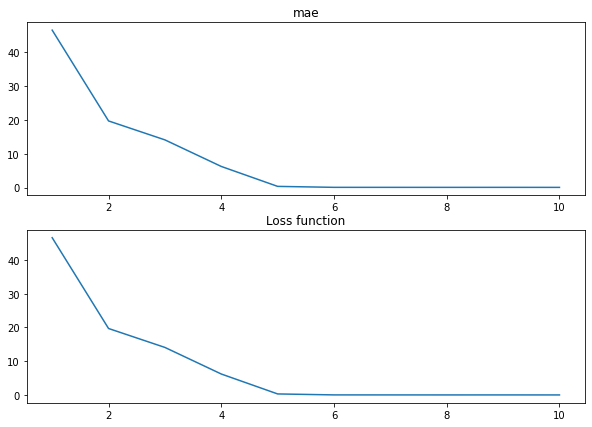

In [82]:
plot_history(history)

### One of the most accurace model